# Predict Loan Eligibility for Dream Housing Finance company


Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
# Importing required libraries
import sklearn
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import accuracy_score, f1_score, classification_report


In [2]:
# Loading the data
train=pd.read_csv('Loan_train.csv')
test=pd.read_csv('Loan_test.csv')

In [3]:
# Have a quick look of train and test data
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# Mearge the train and test data for data cleaning and create new dataframe
df = train.append(test)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(981, 13)

In [7]:
# informaion about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [8]:
# Checking whether null values present in data or not
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [9]:
# Checking columnwise null value percentage
cols = pd.DataFrame(df.isnull().mean().round(4) * 100, columns = ["Percentage of missing values"]).sort_values(by= ["Percentage of missing values"])
cols

,Percentage of missing values
Loan_ID,0.00
Education,0.00
ApplicantIncome,0.00
CoapplicantIncome,0.00
Property_Area,0.00
Married,0.31
Loan_Amount_Term,2.04
Gender,2.45
Dependents,2.55
LoanAmount,2.75


**Filling all categorical column's null values with their Mode**

In [10]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [12]:
df['Self_Employed'].mode()[0]

'No'

In [13]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
df['Self_Employed'].isna().sum()

0

In [15]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [17]:
df['Gender'].mode()[0]

'Male'

In [18]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [19]:
df['Gender'].isna().sum()

0

In [20]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
df['Married'].mode()[0]

'Yes'

In [22]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [23]:
df['Married'].isna().sum()

0

In [24]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [25]:
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [26]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [27]:
df['Dependents'].isna().sum()

0

In [28]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

**Filling numerical column's null values with its Median/Mode**

In [29]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [30]:
df['LoanAmount'].value_counts()

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
218.0     1
62.0      1
53.0      1
242.0     1
197.0     1
Name: LoanAmount, Length: 232, dtype: int64

In [31]:
df['LoanAmount'].median()

126.0

In [32]:
df['LoanAmount'].mode()[0]

120.0

In [33]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [34]:
df['LoanAmount'].isna().sum()

0

In [35]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [36]:
df['Loan_Amount_Term'].isna().sum()

0

In [37]:
df['Credit_History']=df["Credit_History"].fillna(df['Credit_History'].mode()[0])

In [38]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [39]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [40]:
df['Dependents']=df['Dependents'].str.replace('+','')

In [41]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [43]:
df['Dependents']=df['Dependents'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    int64  
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 107.3+ KB


**Univariate Analysis**

<Axes: >

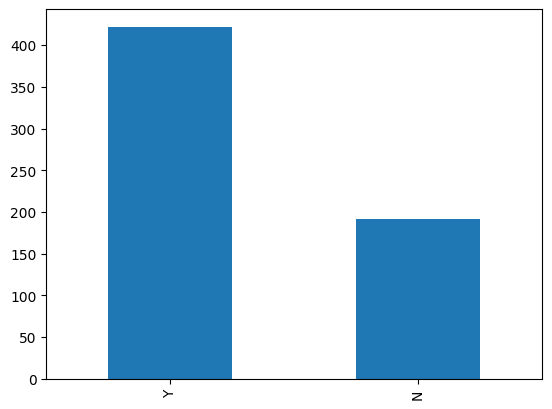

In [45]:
# Dependent feature
train['Loan_Status'].value_counts().plot.bar()


from above graph we can say that, 422(around 69%) people out of 614 got the approval.

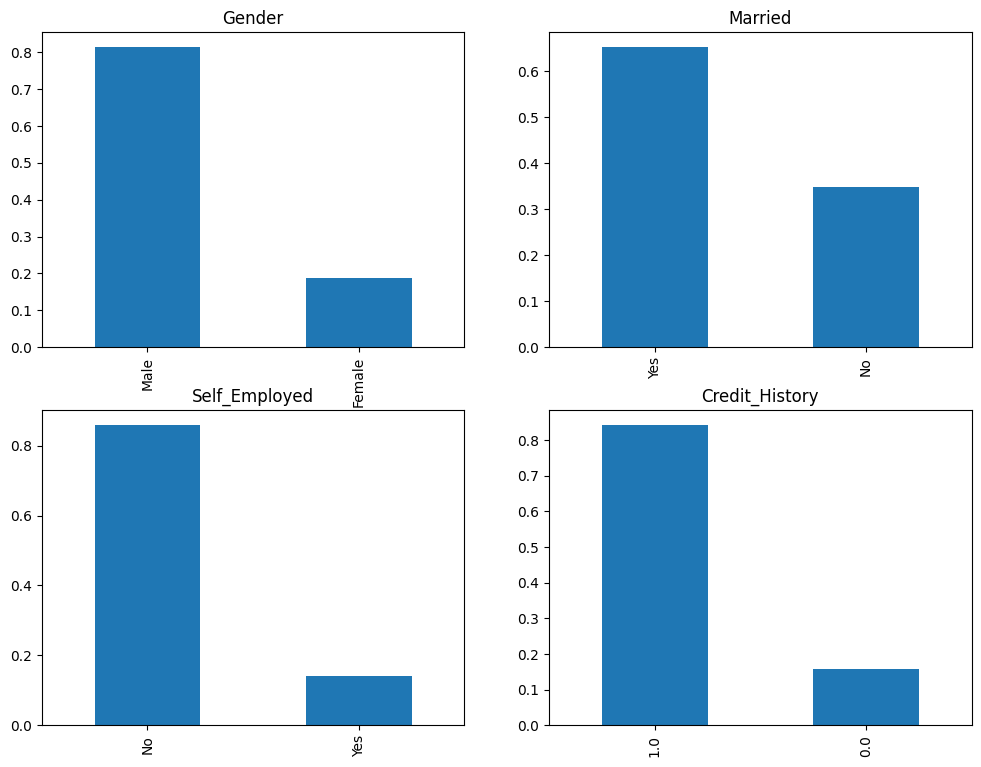

In [46]:
# Visualizing catgorical feature using subplot
plt.figure(figsize=(12, 9))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()


from above graph we can inferred that,
* 80% of applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* About 15% of applicants in the dataset are self-employed.
* About 85% of applicants have repaid their debts.

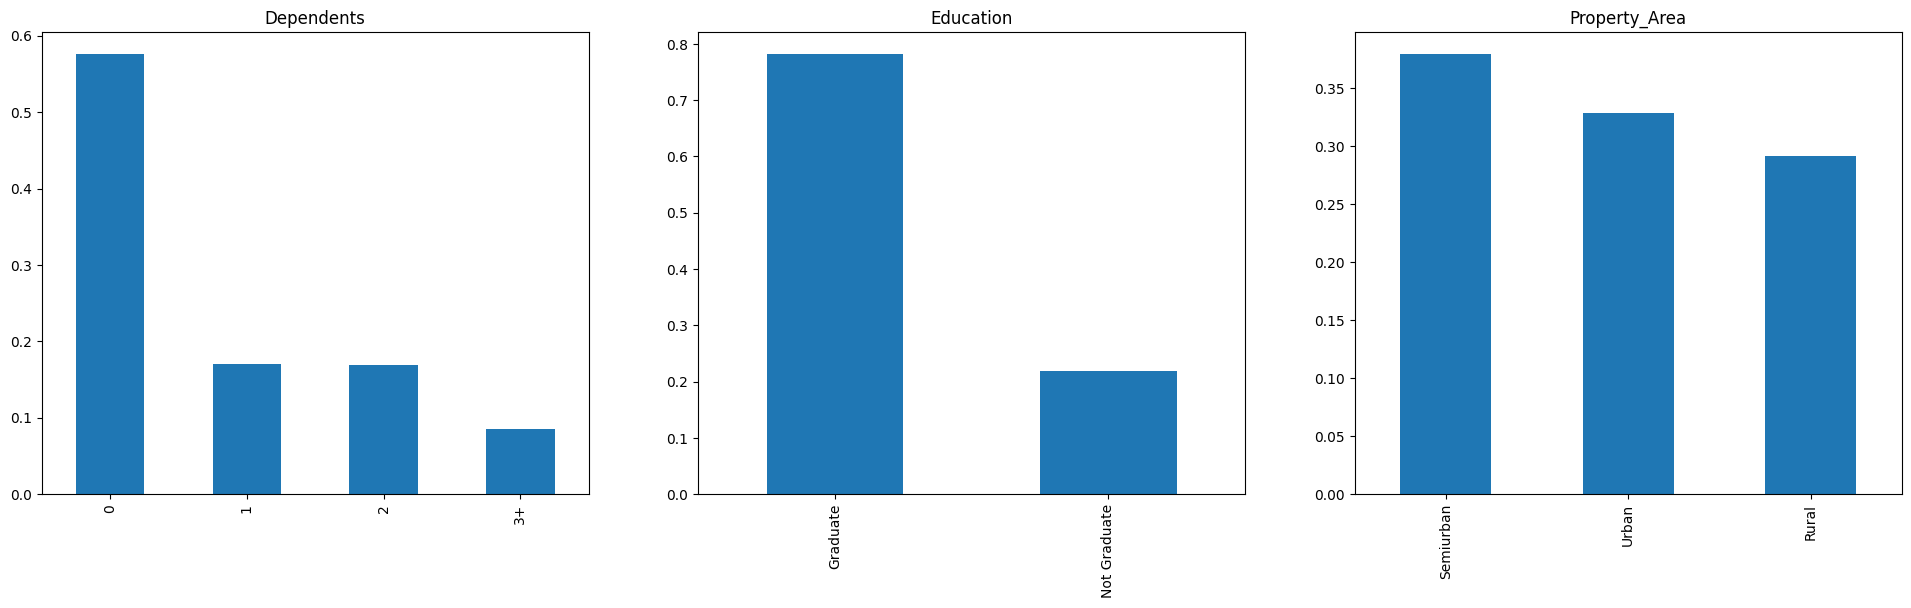

In [47]:
# Visualizing ordinal features
plt.figure(figsize=(24,6))
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

From above bar graph we can inferred that,
* Most of the applicants don’t have dependents.
* About 80% of the applicants are graduates.
* Most of the applicants are from semi-urban areas.

<Axes: xlabel='LoanAmount', ylabel='Density'>

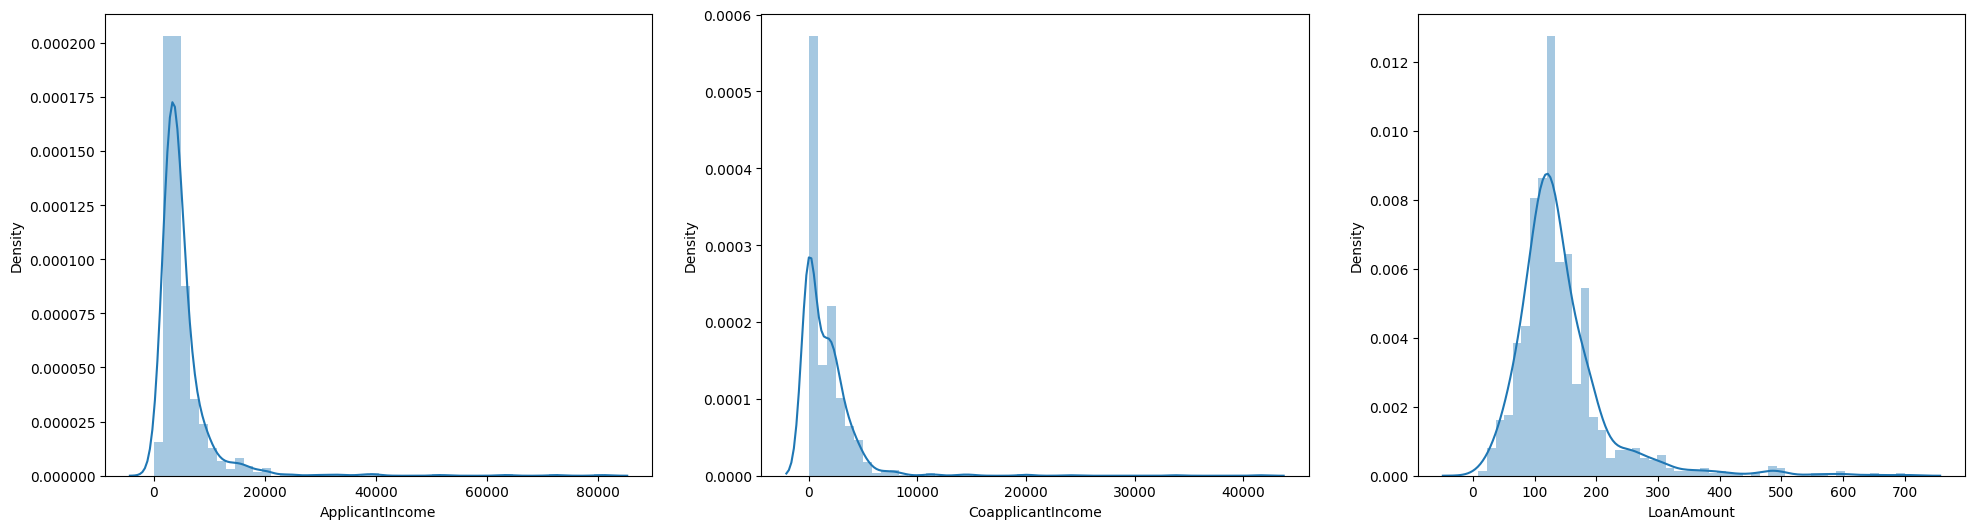

In [48]:
# Visualizing numerical features
plt.figure(figsize=(24,6))
plt.subplot(131)
sns.distplot(df['ApplicantIncome'])
plt.subplot(132)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(133)
sns.distplot(df['LoanAmount'])



By observing above displot, we say that those numerical feature has right skewed data , due to some outliers present in the data.
To acheive normal distribution data, we can apply log transformation on these numerical features

**Bivariate Analysis**

<Axes: xlabel='Gender'>

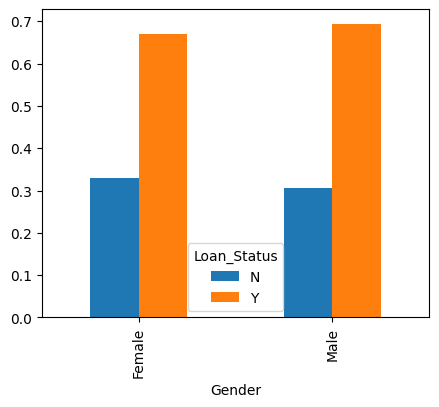

In [49]:
# First of all, we will find the relation between the target variable and categorical independent variables.
# Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(5,4))


It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

In [50]:
# Visualizing other features w.r.t dependent feature

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

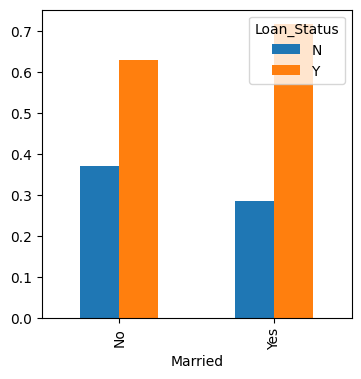

In [51]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()

The proportion of married applicants is higher for the approved loans.

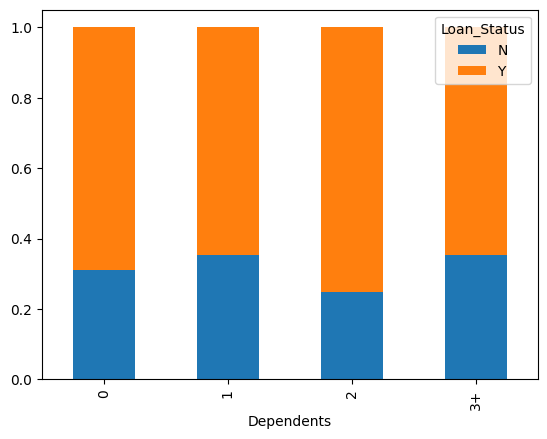

In [52]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

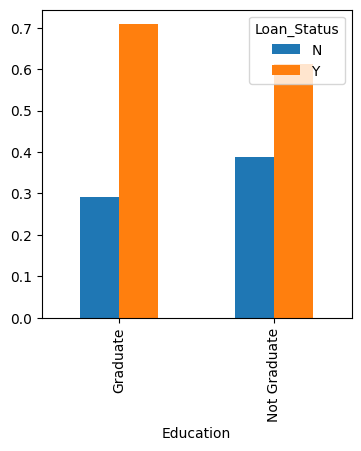

In [53]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()

The proportion of Graduate applicant is more than non graduate for loan approval

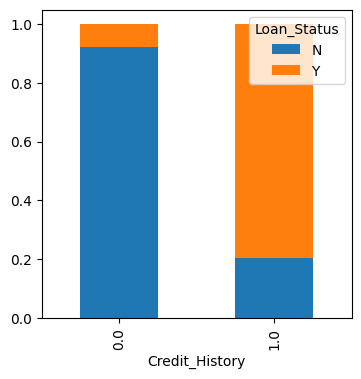

In [54]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

It seems people with a credit history of 1 are more likely to get their loans approved.

**Label Encoding**

In [55]:
# Converting categorical features into numerical feature

dummy_feat=pd.get_dummies(df[['Gender','Married','Education','Self_Employed','Property_Area']],drop_first=True)

In [56]:
dummy_feat.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,1
1,1,1,0,0,0,0
2,1,1,0,1,0,1
3,1,1,1,0,0,1
4,1,0,0,0,0,1


In [57]:
df=pd.concat([df,dummy_feat],axis=1)

In [58]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,1


In [59]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  981 non-null    object 
 1   Dependents               981 non-null    int64  
 2   ApplicantIncome          981 non-null    int64  
 3   CoapplicantIncome        981 non-null    float64
 4   LoanAmount               981 non-null    float64
 5   Loan_Amount_Term         981 non-null    float64
 6   Credit_History           981 non-null    float64
 7   Loan_Status              614 non-null    object 
 8   Gender_Male              981 non-null    uint8  
 9   Married_Yes              981 non-null    uint8  
 10  Education_Not Graduate   981 non-null    uint8  
 11  Self_Employed_Yes        981 non-null    uint8  
 12  Property_Area_Semiurban  981 non-null    uint8  
 13  Property_Area_Urban      981 non-null    uint8  
dtypes: float64(4), int64(2), o

In [61]:
df['Gender_Male']=df['Gender_Male'].astype(int)
df['Married_Yes']=df['Married_Yes'].astype(int)
df['Education_Not Graduate']=df['Education_Not Graduate'].astype(int)
df['Self_Employed_Yes']=df['Self_Employed_Yes'].astype(int)
df['Property_Area_Semiurban']=df['Property_Area_Semiurban'].astype(int)
df['Property_Area_Urban']=df['Property_Area_Urban'].astype(int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  981 non-null    object 
 1   Dependents               981 non-null    int64  
 2   ApplicantIncome          981 non-null    int64  
 3   CoapplicantIncome        981 non-null    float64
 4   LoanAmount               981 non-null    float64
 5   Loan_Amount_Term         981 non-null    float64
 6   Credit_History           981 non-null    float64
 7   Loan_Status              614 non-null    object 
 8   Gender_Male              981 non-null    int64  
 9   Married_Yes              981 non-null    int64  
 10  Education_Not Graduate   981 non-null    int64  
 11  Self_Employed_Yes        981 non-null    int64  
 12  Property_Area_Semiurban  981 non-null    int64  
 13  Property_Area_Urban      981 non-null    int64  
dtypes: float64(4), int64(8), o

**Converting depending feature from object to numerical**

In [63]:
df['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [64]:
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})

In [65]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,126.0,360.0,1.0,1.0,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0.0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1.0,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1.0,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1.0,1,0,0,0,0,1


In [66]:
# Seperating test data
df_test = df[df['Loan_Status'].isna()]

In [67]:
df_test.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,5720,0.0,110.0,360.0,1.0,NaN,1,1,0,0,0,1
1,LP001022,1,3076,1500.0,126.0,360.0,1.0,NaN,1,1,0,0,0,1
2,LP001031,2,5000,1800.0,208.0,360.0,1.0,NaN,1,1,0,0,0,1
3,LP001035,2,2340,2546.0,100.0,360.0,1.0,NaN,1,1,0,0,0,1
4,LP001051,0,3276,0.0,78.0,360.0,1.0,NaN,1,0,1,0,0,1


In [68]:
df_test.drop("Loan_Status", axis=1, inplace=True)

In [69]:
df_test.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,1
1,LP001022,1,3076,1500.0,126.0,360.0,1.0,1,1,0,0,0,1
2,LP001031,2,5000,1800.0,208.0,360.0,1.0,1,1,0,0,0,1
3,LP001035,2,2340,2546.0,100.0,360.0,1.0,1,1,0,0,0,1
4,LP001051,0,3276,0.0,78.0,360.0,1.0,1,0,1,0,0,1


In [70]:
df_train=df[~df['Loan_Status'].isna()]

In [71]:
df_train.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,126.0,360.0,1.0,1.0,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0.0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1.0,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1.0,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1.0,1,0,0,0,0,1


In [72]:
df_train.dtypes

Loan_ID                     object
Dependents                   int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                float64
Gender_Male                  int64
Married_Yes                  int64
Education_Not Graduate       int64
Self_Employed_Yes            int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
dtype: object

In [73]:
df_train['Loan_Status']=df_train['Loan_Status'].astype(int)

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    int64  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    int64  
 8   Gender_Male              614 non-null    int64  
 9   Married_Yes              614 non-null    int64  
 10  Education_Not Graduate   614 non-null    int64  
 11  Self_Employed_Yes        614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
dtypes: float64(4), int64(9), o

In [75]:
test_data=df_test.drop('Loan_ID',axis=1)

In [76]:
test_data.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500.0,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800.0,208.0,360.0,1.0,1,1,0,0,0,1


In [77]:
# train and test data size
print(f"Train data shape :: {df_train.shape}")
print(f"Test data shape :: {df_test.shape}")

Train data shape :: (614, 14)
Test data shape :: (367, 13)


**Getting independent and dependent features**

In [78]:
X = df_train.drop(["Loan_ID", "Loan_Status"], axis=1 )
y = df_train['Loan_Status']

**Model 1 - Logistic Regression**

In [79]:
# splitting data into train and cross_validation test data
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=300)

In [80]:
# let's check shape of train and cross validation set
print(f"Train stats : {X_train.shape} | {y_train.shape}")
print(f"CV stats : {X_cv.shape} | {y_cv.shape}")

Train stats : (491, 12) | (491,)
CV stats : (123, 12) | (123,)


In [81]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)

LogisticRegression()

In [82]:
# Let's predict the Loan_Status for the validation set and calculate its accuracy.

pred_cv = Log_reg.predict(X_cv)


In [83]:
# Let us calculate how accurate our predictions are by calculating the accuracy.


print(f"Accuracy Score of Logistic model :   {(accuracy_score(y_cv,pred_cv)*100).round(2)} %")
print(f"F1 Score of Logistic model: {f1_score(y_cv,pred_cv)*100}")
print(f"Classification report of Logistic model: \n {classification_report(y_cv,pred_cv)}")


Accuracy Score of Logistic model :   85.37 %
F1 Score of Logistic model: 90.625
Classification report of Logistic model: 
               precision    recall  f1-score   support

           0       0.82      0.56      0.67        32
           1       0.86      0.96      0.91        91

    accuracy                           0.85       123
   macro avg       0.84      0.76      0.79       123
weighted avg       0.85      0.85      0.84       123



**So, our Logistic model predicts the loan status around 85.37 % Accurately.**

In [84]:
# Let’s make predictions for the test dataset.

pred_test = Log_reg.predict(test_data)


In [85]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [86]:
output=pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'Loan_Status':pred_test})

In [87]:
output.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [88]:
# output.to_csv('LogModelsubmission.csv',index=False)

**Model2 - Random Forest**

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [90]:
Rf=RandomForestClassifier()
Rf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
pred_Rf = Rf.predict(X_cv)

In [92]:
# let's check performance of Random forest model
print(f"Accuracy Score of Random Forest model :   {(accuracy_score(y_cv,pred_Rf)*100).round(2)} %")
print(f"F1 Score of Random Forest model: {f1_score(y_cv,pred_Rf)*100}")
print(f"Classification report of Random Forest model: \n {classification_report(y_cv,pred_Rf)}")


Accuracy Score of Random Forest model :   82.11 %
F1 Score of Random Forest model: 88.42105263157896
Classification report of Random Forest model: 
               precision    recall  f1-score   support

           0       0.71      0.53      0.61        32
           1       0.85      0.92      0.88        91

    accuracy                           0.82       123
   macro avg       0.78      0.73      0.75       123
weighted avg       0.81      0.82      0.81       123



**so, random forest model predicts loan status with accuracy 82.11 %**

In [93]:
# let's predict test data
predict_test2 = Rf.predict(test_data)

In [94]:
Rf_output = pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'Loan_Status':predict_test2})

In [95]:
Rf_output.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [96]:
# Rf_output.to_csv('rfmodelsubmission.csv',index=False)

**Random forest with hyperparameter tuning using RandomizedSearchCV model**

In [97]:
rfc=RandomForestClassifier()

In [98]:
# Number of tree in random forest
n_estimators = [int(x) for x in np.linspace(start=10,stop=500,num=10)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,100,10)]

# minimum number of samples required to split a node
min_samples_split = [2,5,7,9,10]

# minimum number of sample required at each leaf node
min_samples_leaf = [1,2,4,6]


# Create a random grid
random_grid = {"n_estimators" : n_estimators,
            "max_features" : max_features,
            "max_depth"    : max_depth,
            "min_samples_split" : min_samples_split,
            "min_samples_leaf"  : min_samples_leaf,
            "criterion":['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'min_samples_split': [2, 5, 7, 9, 10], 'min_samples_leaf': [1, 2, 4, 6], 'criterion': ['entropy', 'gini']}


In [99]:
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,cv=3,n_iter=10, verbose=1,n_jobs=-1)

In [100]:
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 7, 9, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   verbose=1)

In [101]:
print(f"Best parameters : {rfc_random.best_params_}")

Best parameters : {'n_estimators': 173, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 67, 'criterion': 'gini'}


In [102]:
# Predict data
pred_rfc = rfc_random.predict(X_cv)

In [103]:
# Predict test data
pred_rfc_test = rfc_random.predict(test_data)

In [104]:
# now check performance of random forest with hyperparameter model

print(f"Accuracy Score of Random Forest model with hyperparameter : {(accuracy_score(y_cv,pred_rfc)*100).round(2)}%")
print(f"F1 Score of Random Forest model with hyperparameter: {f1_score(y_cv,pred_rfc)*100}")
print(f"Classification report of Random Forest model with hyperparameter: \n {classification_report(y_cv,pred_rfc)}")


Accuracy Score of Random Forest model with hyperparameter : 86.99%
F1 Score of Random Forest model with hyperparameter: 91.83673469387755
Classification report of Random Forest model with hyperparameter: 
               precision    recall  f1-score   support

           0       0.94      0.53      0.68        32
           1       0.86      0.99      0.92        91

    accuracy                           0.87       123
   macro avg       0.90      0.76      0.80       123
weighted avg       0.88      0.87      0.86       123



**Using random forest with gridsearch cv got accuracy around 87%**

In [105]:
RandomCv_output = pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'Loan_Status':pred_rfc_test})

In [106]:
RandomCv_output.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [107]:
# RandomCv_output.to_csv('rfcmodelsubmission.csv',index=False)

**Model3 - XGBoost**

In [108]:
import xgboost

In [109]:
xgmodel=xgboost.XGBClassifier()

In [110]:
xgmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
pred_xg = xgmodel.predict(X_cv)

In [112]:
# Checking performance of xgboost model
print(f"Accuracy Score of XGBoost Model : {(accuracy_score(y_cv, pred_xg)*100).round(2)}%")
print(f"F1 Score of Logistic model: {f1_score(y_cv,pred_xg)*100}")
print(f"Classification report of xgboost model: \n {classification_report(y_cv,pred_xg)}")


Accuracy Score of XGBoost Model : 82.11%
F1 Score of Logistic model: 87.64044943820224
Classification report of xgboost model: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68        32
           1       0.90      0.86      0.88        91

    accuracy                           0.82       123
   macro avg       0.77      0.79      0.78       123
weighted avg       0.83      0.82      0.82       123



**XGboost model predicts with accuracy 82.11%**

In [113]:
# Predict test data
pred_xg_model = xgmodel.predict(test_data)

In [114]:
xg_output=pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'Loan_Status':pred_xg_model})

In [115]:
xg_output.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,0
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [116]:
#xg_output.to_csv('xgboostmodelsubmission.csv',index=False)

**XGBoost Model with HyperParameter using Randomizedsearchcv model**

In [117]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [118]:
hyper_xg=RandomizedSearchCV(xgmodel, param_distributions=params,n_iter=5,n_jobs=-1,cv=5)

In [119]:
hyper_xg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]})

In [120]:
hyper_xg.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [121]:
predict_hyper_xg = hyper_xg.predict(X_cv)

In [122]:
# Check performance of xgboost model with hyperparameter
print(f"Accuracy Score of XGBoost Model using hyper parameter tuned : {(accuracy_score(y_cv, predict_hyper_xg)*100).round(2)}%")
print(f"F1 Score of xgboost model using hyper parameter tuned model: {f1_score(y_cv,pred_xg)*100}")
print(f"Classification report of xgboost model using hyper parameter tuned: \n {classification_report(y_cv,pred_xg)}")


Accuracy Score of XGBoost Model using hyper parameter tuned : 87.8%
F1 Score of xgboost model using hyper parameter tuned model: 87.64044943820224
Classification report of xgboost model using hyper parameter tuned: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68        32
           1       0.90      0.86      0.88        91

    accuracy                           0.82       123
   macro avg       0.77      0.79      0.78       123
weighted avg       0.83      0.82      0.82       123



**Xgboost model with hyper parameter tuning predicts output with best ever accuracy as 87.80%**

In [123]:
# now predict test data
pred_xg_hyper_test = hyper_xg.predict(test_data)

In [124]:
hyper_xg_output = pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'Loan_Status':pred_xg_hyper_test})

In [125]:
hyper_xg_output.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [126]:
#hyper_xg_output.to_csv('Hyper_xgboostmodelsubmission.csv',index=False)